# Here, I have imported all libraries which is needed

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read our CSV File

In [80]:
df = pd.read_csv('50_Startups.csv')

## random 5 rows using pandas sample method for understanding that how our data look like

In [81]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
13,91992.39,135495.07,252664.93,California,134307.35
40,28754.33,118546.05,172795.67,California,78239.91
48,542.05,51743.15,0.00,New York,35673.41
21,78389.47,153773.43,299737.29,New York,111313.02
25,64664.71,139553.16,137962.62,California,107404.34


## How big our data is

In [82]:
df.shape

(50, 5)

## How does the data look mathmatical


In [83]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data Type of our columns

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Checking duplicates

In [85]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## to Finding the correlation bertween our columns

In [86]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## for Checking the correlation all three features with Profit

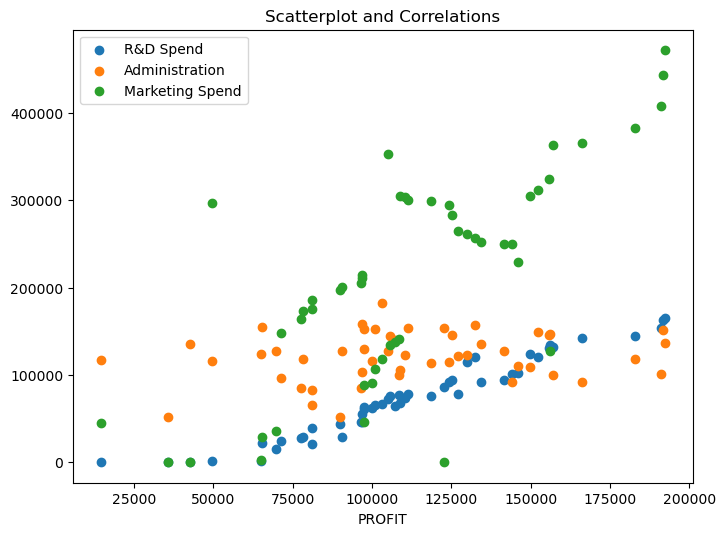

In [87]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter('Profit', 'R&D Spend',data=df)
plt.scatter('Profit', 'Administration',data=df)
plt.scatter('Profit', 'Marketing Spend',data=df)

plt.title('Scatterplot and Correlations')
plt.xlabel("PROFIT")

plt.legend()
plt.show()

## Checking Outliers

In [88]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [89]:
df1 = df.loc[:,['R&D Spend','Administration','Marketing Spend','Profit']]

In [90]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


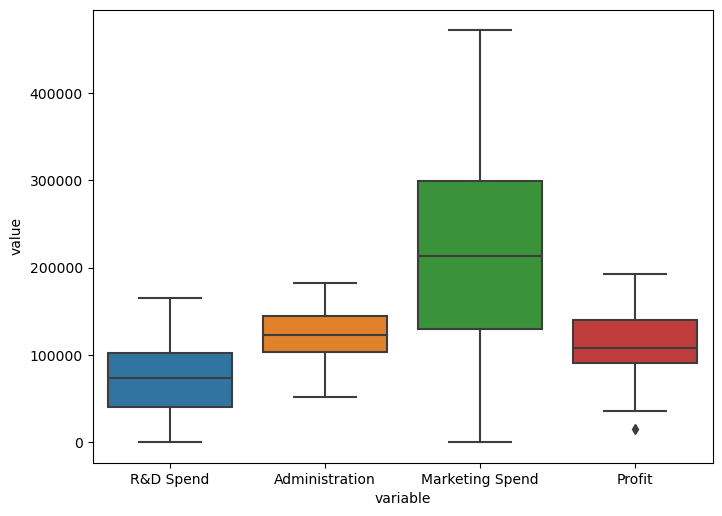

In [91]:
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

In [92]:
#Checking unique values in State columns

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [93]:
# Converting all values into numbers of State column using pandas replace method

df['State'].replace(['New York', 'California','Florida'],
                        [1,2,3], inplace=True)

In [94]:
#Updated DataFrame

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [95]:
#Splitng data for train and test purpose

X = df.iloc[:,:4]

In [96]:
y= df.iloc[:,-1:]

## Here, imported sklearn method which divide our data into train and test randomly 

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0) 

In [99]:
X_train.shape

(35, 4)

In [100]:
X_test.shape

(15, 4)

In [101]:
y_train.shape

(35, 1)

In [102]:
y_test.shape

(15, 1)

## Importing ML Algo. LinearRegression for do precdiction

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
predict = lr.predict(X_test)

In [107]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,predict)

In [108]:
print("Accuracy is:- ",accuracy)

Accuracy is:-  0.9355569657690967
